In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import display

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Save references to each table (Part 1)
Station = Base.classes.station
Measurement = Base.classes.measurement

# Display the station table row's columns and data in dictionary format
station_first_row = session.query(Station).first()
display(station_first_row.__dict__)

# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

# Use 'engine.execute' to select and display the first 10 rows from the station table
stations = engine.execute('SELECT * FROM Station LIMIT 10').fetchall()
display(stations)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e42e193160>,
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0}

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [10]:
# Display the measurement table row's columns and data in dictionary format
measurement_first_row = session.query(Measurement).first()
display(measurement_first_row.__dict__)

# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

# Use 'engine.execute' to select and display the first 10 rows from the measurement table
measurements = engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()
display(measurements)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e42a835790>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date = list(most_recent_date)
most_recent_date

['2017-08-23']

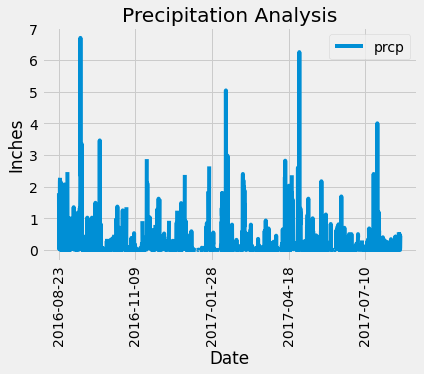

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
start_date = dt.datetime.strptime(most_recent_date[0], "%Y-%m-%d")- dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(results, columns = ['date', 'prcp'])
precipitation_df.set_index(precipitation_df['date'], inplace = True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title = 'Precipitation Analysis')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = len(session.query(Station.name).distinct().all())
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# Store count in variable to shorten query code
station_count = func.count(Measurement.station)

# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, station_count).group_by(Measurement.station).\
                            order_by(station_count.desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Store temperatures in variables to shorten query code
max_temp = func.max(Measurement.tobs)
avg_temp = func.avg(Measurement.tobs)
min_temp = func.min(Measurement.tobs)

# Query code
temp_results = session.query(min_temp, max_temp, avg_temp).filter(Measurement.station == 'USC00519281').first()
temp_results

(54.0, 85.0, 71.66378066378067)

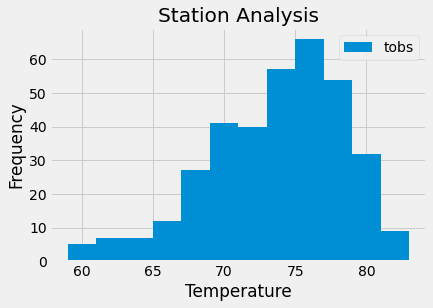

In [17]:
# Using the most active station id
# Find the most recent date from the most active stations query
latest_date = session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').first()
latest_date = list(latest_date)
start_date_2 = dt.datetime.strptime(latest_date[0], '%Y-%m-%d') - dt.timedelta(days = 366)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observations = session.query(Measurement.tobs).filter(Measurement.date >= start_date_2).\
            filter(Measurement.station == 'USC00519281').all()

temp_obv_df = pd.DataFrame(temp_observations, columns = ['tobs'])
temp_obv_df.plot.hist(bins = 12, title = 'Station Analysis')
plt.xlabel('Temperature')
plt.show()

# Close session

In [18]:
# Close Session
session.close()